In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_boats = pd.read_csv('../data/small-boat-arrivals.csv')
df_boats

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,2018,7,0,0,0,0,4,0,10,7,23,110,138,299
1,2019,45,88,66,80,150,163,195,342,210,75,151,278,1843
2,2020,94,183,188,558,743,727,1111,1469,1949,474,761,209,8466
3,2021,224,308,831,750,1627,2177,3512,3053,4602,2701,6971,1770,28526
4,2022,1339,143,3066,2143,2916,3140,3673,8574,8054,6900,4082,1744,45774
5,2023,1180,1773,840,2153,1664,3823,3299,5369,4729,1869,1661,1077,29437
6,2024,1335,920,3180,2132,2881,3041,3414,4149,4192,5417,2901,3254,36816


Text(0, 0.5, 'Arrivals by small boat')

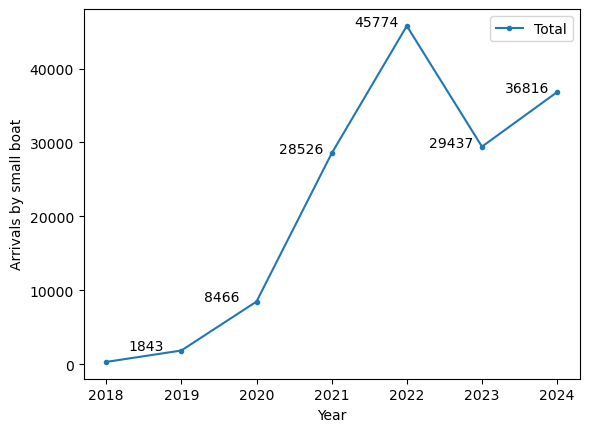

In [16]:
df_boats.plot(kind='line', x='Year', y='Total', marker='.')
for i in range(df_boats.shape[0]):
    plt.annotate(df_boats.iloc[i]['Total'], (df_boats.iloc[i]['Year'] - 0.7, df_boats.iloc[i]['Total']))

plt.ylabel('Arrivals by small boat')

Notes from the plot:
1. Small boat arrivals seem to drastically rise starting in 2020 - possibly linked to COVID
2. Small drop in arrivals in 2023, but set to rise 2024 onwards

In [25]:
df_boats

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,2018,7,0,0,0,0,4,0,10,7,23,110,138,299
1,2019,45,88,66,80,150,163,195,342,210,75,151,278,1843
2,2020,94,183,188,558,743,727,1111,1469,1949,474,761,209,8466
3,2021,224,308,831,750,1627,2177,3512,3053,4602,2701,6971,1770,28526
4,2022,1339,143,3066,2143,2916,3140,3673,8574,8054,6900,4082,1744,45774
5,2023,1180,1773,840,2153,1664,3823,3299,5369,4729,1869,1661,1077,29437
6,2024,1335,920,3180,2132,2881,3041,3414,4149,4192,5417,2901,3254,36816


In [31]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]

In [34]:
df_transpose = df_boats.transpose()
df_transpose.columns = df_transpose.iloc[0]
df_transpose = df_transpose.drop(['Year', 'Total'])
df_transpose

Year,2018,2019,2020,2021,2022,2023,2024
Jan,7,45,94,224,1339,1180,1335
Feb,0,88,183,308,143,1773,920
Mar,0,66,188,831,3066,840,3180
Apr,0,80,558,750,2143,2153,2132
May,0,150,743,1627,2916,1664,2881
Jun,4,163,727,2177,3140,3823,3041
Jul,0,195,1111,3512,3673,3299,3414
Aug,10,342,1469,3053,8574,5369,4149
Sep,7,210,1949,4602,8054,4729,4192
Oct,23,75,474,2701,6900,1869,5417


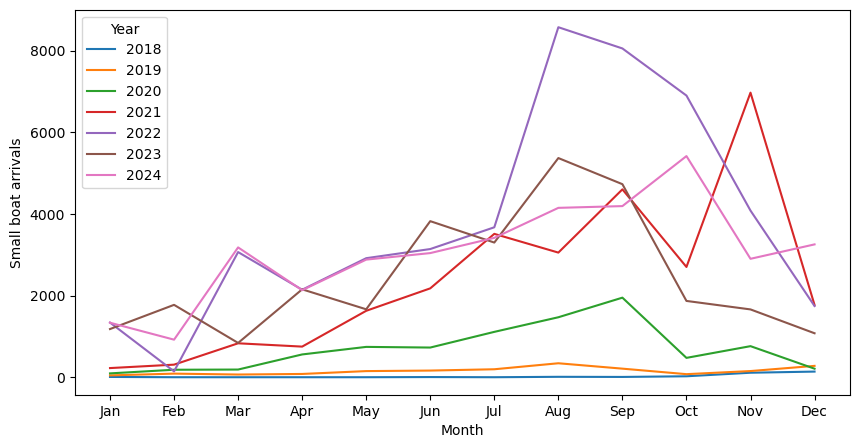

In [41]:
df_transpose[years].plot(kind='line', figsize=(10, 5))
plt.xticks(np.arange(12), months)
plt.xlabel('Month')
plt.ylabel('Small boat arrivals')
plt.show()

Notes from the plot:
1. Most boat arrivals seem to come between July and October - likely due to favourable weather
2. 2020 seems to be the year boat arrivals start rising considerably

In [42]:
df_nation = pd.read_csv('../data/small-boat-nationality.csv')
df_nation

,Nationality,2018,2019,2020,2021,2022,2023,2024
0,Eritrea,0,0,511,2875,2020,2666,3480
1,Afghanistan,3,69,494,1437,9088,5511,6065
2,Sudan,0,0,969,1064,1762,1658,2748
3,Somalia,0,0,14,318,86,248,697
4,Iran,238,1213,2373,8319,5841,3582,4214
5,Vietnam,4,3,118,1403,505,1306,3657
6,Yemen,0,0,252,135,160,91,1300
7,Ethiopia,0,5,108,544,530,249,508
8,Iraq,33,471,1648,6117,4574,2536,2142
9,Syria,1,14,776,2451,3006,2275,4693


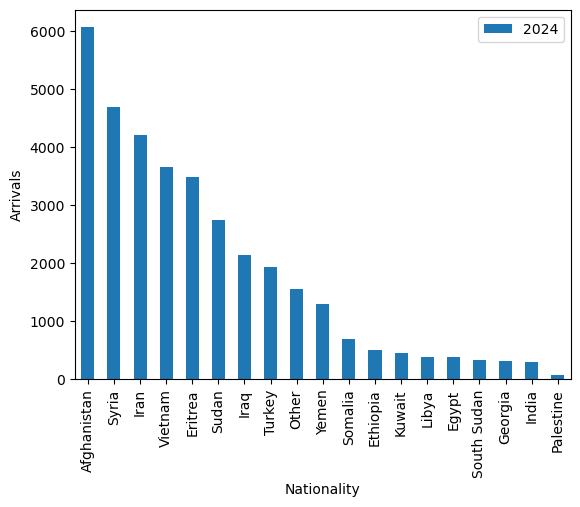

In [49]:
df_select = df_nation.drop(19)
df_select.sort_values(by=['2024'], ascending=False).plot(kind='bar', x='Nationality', y='2024')
plt.ylabel('Arrivals')
plt.show()

Notes:
1. Most small boat arrivals come from nations in conflict (Afghanistan, Syria, Iran, Eritrea etc.)
2. However there are exceptions such as Vietnam and Turkey - more data might be needed such as asylum grant rates

In [57]:
df_nation_t = df_nation.transpose()
df_nation_t.columns = df_nation_t.iloc[0]
df_nation_t.drop('Nationality', inplace=True)
df_nation_t.drop(['Total', 'Other', 'Georgia', 'South Sudan', 'Palestine', 'Libya'], axis=1, inplace=True)
df_nation_t

Nationality,Eritrea,Afghanistan,Sudan,Somalia,Iran,Vietnam,Yemen,Ethiopia,Iraq,Syria,Turkey,Kuwait,Egypt,India
2018,0,3,0,0,238,4,0,0,33,1,0,0,0,0
2019,0,69,0,0,1213,3,0,5,471,14,2,2,1,0
2020,511,494,969,14,2373,118,252,108,1648,776,10,79,53,64
2021,2875,1437,1064,318,8319,1403,135,544,6117,2451,69,537,366,67
2022,2020,9088,1762,86,5841,505,160,530,4574,3006,1127,374,1233,748
2023,2666,5511,1658,248,3582,1306,91,249,2536,2275,3058,309,810,1214
2024,3480,6065,2748,697,4214,3657,1300,508,2142,4693,1944,462,378,293


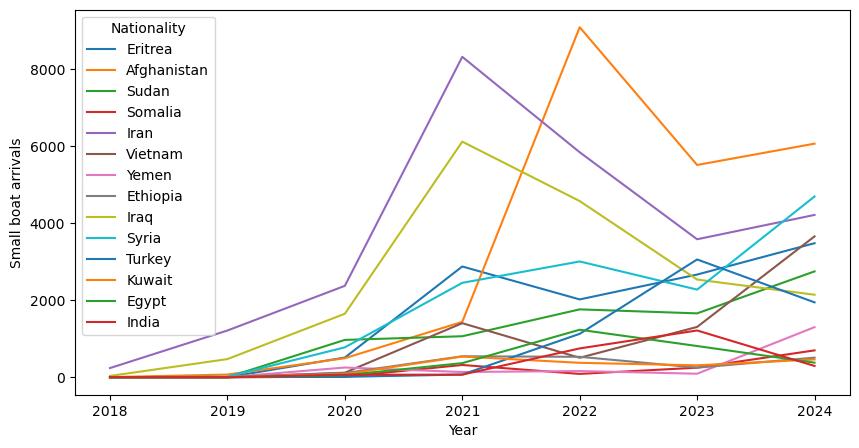

In [60]:
df_nation_t.plot(kind='line', figsize=(10, 5))
plt.ylabel('Small boat arrivals')
plt.xlabel('Year')
plt.show()

Notes:
1. Trends fluctuate between countries, suggesting that reasons for small boat arrivals are country specific
2. Large spikes for Iran & Iraq in 2021, Afghanistan in 2022 - Correlated with political tension in each country
3. Despite fluctuations, most arrivals by country seem to be rising over time

In [61]:
df_age = pd.read_csv('../data/small-boat-age-sex.csv')
df_age

,Sex,Age Group,2018,2019,2020,2021,2022,2023,2024
0,Male,17 and under,16,207,1089,3347,6400,4312,4306
1,Male,18 to 24,39,264,1785,9035,14774,9067,11252
2,Male,25 to 39,185,919,3840,11059,15993,9727,13593
3,Male,40 and over,33,164,669,1448,2767,1725,2204
4,Female,17 and under,9,101,360,925,1671,938,1124
5,Female,18 to 24,2,24,141,533,970,756,1216
6,Female,25 to 39,14,125,427,1224,2200,1441,1872
7,Female,40 and over,1,39,155,297,580,413,509
8,Unknown,17 and under,0,0,0,49,90,3,0
9,Unknown,18 to 24,0,0,0,11,65,10,0


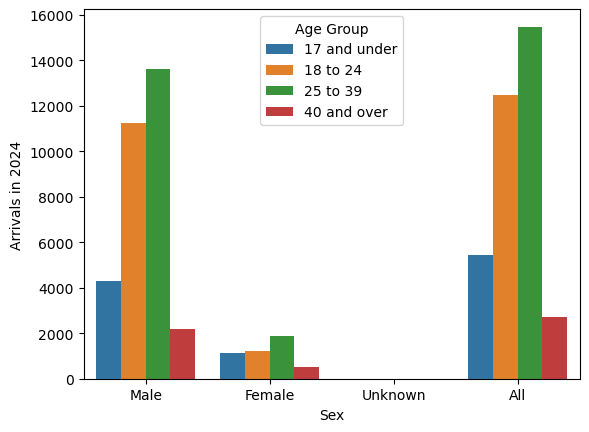

In [63]:
sns.barplot(data=df_age, x='Sex', y='2024', hue='Age Group')
plt.ylabel('Arrivals in 2024')
plt.show()

Notes:
1. Males make up the majority of small boat arrivals
2. Most small boat arrivals are aged 18-39
3. Females have a higher proportion of arrivals aged under 17 than males

In [74]:
df_overall = df_age[df_age['Sex'] == 'All']
df_overall.drop('Sex', axis=1, inplace=True)
df_overall = df_overall.transpose()
df_overall.columns = df_overall.iloc[0]
df_overall.drop('Age Group', inplace=True)
df_overall

C:\Users\alecw\AppData\Local\Temp\ipykernel_8856\974398890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overall.drop('Sex', axis=1, inplace=True)


Age Group,17 and under,18 to 24,25 to 39,40 and over
2018,25,41,199,34
2019,308,288,1044,203
2020,1449,1926,4267,824
2021,4321,9579,12293,1751
2022,8161,15809,18242,3362
2023,5253,9833,11177,2138
2024,5430,12468,15466,2713


<Axes: >

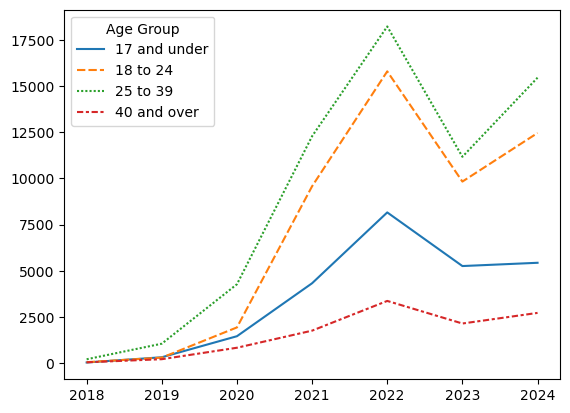

In [75]:
sns.lineplot(data=df_overall)

Notes:
1. Age has stayed proportionally similar over the years
2. People aged 18-39 are starting to make up more of the arrival population